## Overview

Welcome to the **Software Engineer (ML & LLMs)** Application Challenge.
In this, you will have the opportunity to get closer to a part of the reality of the role, and demonstrate your skills and knowledge in machine learning and cloud.

## Problem

Predict the probability of **delay** for a flight taking off or landing at SCL airport.

|Column|Description|
|-----|-----------|
|`Fecha-I`|Scheduled date and time of the flight.|
|`Vlo-I`|Scheduled flight number.|
|`Ori-I`|Programmed origin city code.|
|`Des-I`|Programmed destination city code.|
|`Emp-I`|Scheduled flight airline code.|
|`Fecha-O`|Date and time of flight operation.|
|`Vlo-O`|Flight operation number of the flight.|
|`Ori-O`|Operation origin city code.|
|`Des-O`|Operation destination city code.|
|`Emp-O`|Airline code of the operated flight.|
|`DIA`|Day of the month of flight operation.|
|`MES`|Number of the month of operation of the flight.|
|`AÑO`|Year of flight operation.|
|`DIANOM`|Day of the week of flight operation.|
|`TIPOVUELO`|Type of flight, I =International, N =National.|
|`OPERA`|Name of the airline that operates.|
|`SIGLAORI`|Name city of origin.|
|`SIGLADES`|Destination city name.|

|Column|Description|
|-----|-----------|
|`high_season`|1 if `Date-I` is between Dec-15 and Mar-3, or Jul-15 and Jul-31, or Sep-11 and Sep-30, 0 otherwise.|
|`min_diff`|difference in minutes between `Date-O` and `Date-I`|
|`period_day`|morning (between 5:00 and 11:59), afternoon (between 12:00 and 18:59) and night (between 19:00 and 4:59), based on `Date-I`.|
|`delay`|1 if `min_diff` > 15, 0 if not.|

In [3]:
import pandas as pd

data = pd.read_csv('./04/flights.csv')
data.head()

/tmp/ipykernel_206848/3361848977.py:3: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./04/flights.csv')


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [5]:
# `min_diff`|difference in minutes between `Date-O` and `Date-I`|

from datetime import datetime

def get_min_diff(data):
    # 2017-01-01 23:30:00
    fecha_o = datetime.strptime(data["Fecha-O"], "%Y-%m-%d %H:%M:%S")
    fecha_i = datetime.strptime(data["Fecha-I"], "%Y-%m-%d %H:%M:%S")
    min_diff = (fecha_o - fecha_i).total_seconds() / 60
    return min_diff

data["min_diff"] = data.apply(get_min_diff, axis=1)

In [6]:
data.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,min_diff
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,3.0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,9.0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,9.0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,3.0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,-2.0


In [7]:
import numpy as np

data["delay"] = np.where(data["min_diff"] > 15, 1, 0)

In [8]:
data.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,min_diff,delay
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,3.0,0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,9.0,0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,9.0,0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,3.0,0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,-2.0,0


In [11]:
data['delay'].value_counts()

delay
0    55592
1    12614
Name: count, dtype: int64

<Axes: title={'center': 'Delay/NoDelay by OPERA'}>

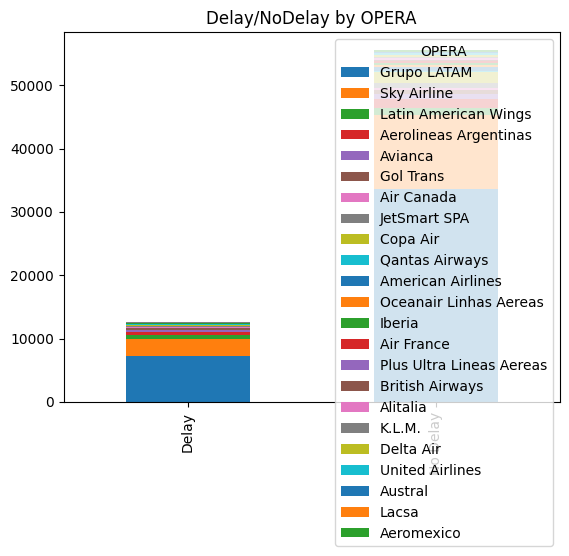

In [13]:
opera_by_delay = data[data["delay"]==1]["OPERA"].value_counts()
opera_by_delay.head()

opera_by_not_delay = data[data["delay"]==0]["OPERA"].value_counts()
opera_by_not_delay.head()

df_by_opera = pd.DataFrame([opera_by_delay, opera_by_not_delay])
df_by_opera.index = ["Delay", "No Delay"]
df_by_opera.plot(kind="bar", stacked=True, title="Delay/NoDelay by OPERA")

In [14]:
data["OPERA"].value_counts()

OPERA
Grupo LATAM                 40892
Sky Airline                 14298
Aerolineas Argentinas        1949
Copa Air                     1850
Latin American Wings         1674
Avianca                      1152
JetSmart SPA                 1095
Gol Trans                     806
American Airlines             757
Air Canada                    565
Iberia                        362
Air France                    358
Delta Air                     358
Aeromexico                    351
United Airlines               335
Oceanair Linhas Aereas        279
Alitalia                      259
K.L.M.                        251
British Airways               205
Qantas Airways                195
Lacsa                          92
Austral                        74
Plus Ultra Lineas Aereas       49
Name: count, dtype: int64

In [15]:
data["DIA"].value_counts()

DIA
20    2290
27    2286
12    2284
10    2283
6     2275
13    2272
22    2272
3     2271
16    2268
26    2267
21    2267
7     2264
23    2260
5     2241
15    2239
19    2238
11    2237
28    2232
24    2232
17    2228
9     2227
2     2223
14    2221
4     2215
8     2213
1     2208
25    2179
18    2160
29    2044
30    2020
31    1290
Name: count, dtype: int64

In [16]:
data["MES"].value_counts()

MES
12    6356
1     6108
11    6080
10    6032
7     5992
8     5744
9     5610
2     5561
3     5482
5     5240
4     5020
6     4981
Name: count, dtype: int64

In [17]:
data["TIPOVUELO"].value_counts()

TIPOVUELO
N    36966
I    31240
Name: count, dtype: int64

<Axes: title={'center': 'Delay/NoDelay by TipoVuelo'}>

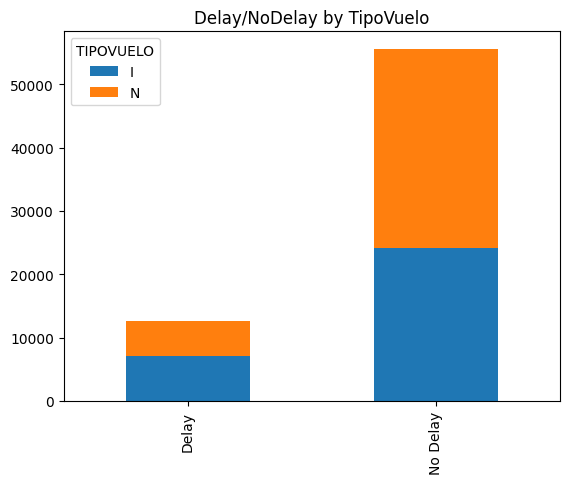

In [19]:
tipo_vuelo_by_delay = data[data["delay"]==1]["TIPOVUELO"].value_counts()
tipo_vuelo_by_delay.head()

tipo_vuelo_by_not_delay = data[data["delay"]==0]["TIPOVUELO"].value_counts()
tipo_vuelo_by_not_delay.head()

df_by_tipo_vuelo = pd.DataFrame([tipo_vuelo_by_delay, tipo_vuelo_by_not_delay])
df_by_tipo_vuelo.index = ["Delay", "No Delay"]
df_by_tipo_vuelo.plot(kind="bar", stacked=True, title="Delay/NoDelay by TipoVuelo")

In [24]:
!pip install seaborn

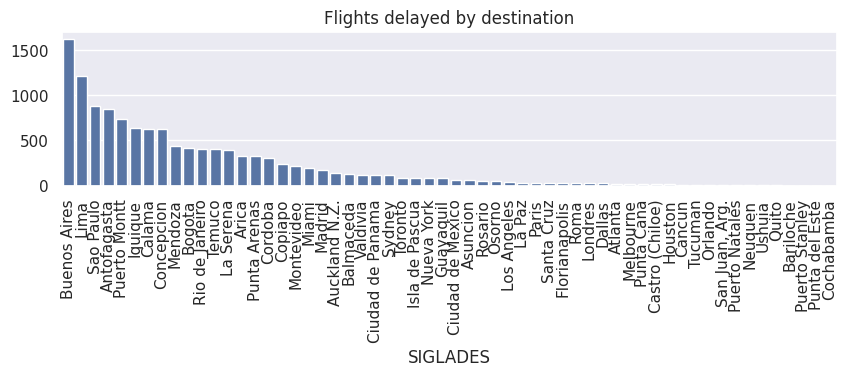

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

flights_delayed_by_destination = data[data["delay"]==1]["SIGLADES"].value_counts()
plt.figure(figsize = (10, 2))
sns.set(style="darkgrid")
sns.barplot(x=flights_delayed_by_destination.index, y = flights_delayed_by_destination.values)
plt.title("Flights delayed by destination")
plt.xticks(rotation = 90)
plt.show()


In [31]:
# |`period_day`|
# morning (between 5:00 and 11:59)
# afternoon (between 12:00 and 18:59)
# night (between 19:00 and 4:59), based on `Date-I`.|

from datetime import datetime

def get_period_day(date):
    date_time = datetime.strptime(date, "%Y-%m-%d %H:%M:%S").time()
    morning_min = datetime.strptime("05:00", "%H:%M").time()
    morning_max = datetime.strptime("11:59", "%H:%M").time()
    afternoon_min = datetime.strptime("12:00", "%H:%M").time()
    afternoon_max = datetime.strptime("18:59", "%H:%M").time()
    evening_min = datetime.strptime("19:00", "%H:%M").time()
    evening_max = datetime.strptime("23:59", "%H:%M").time()
    night_min = datetime.strptime("00:00", "%H:%M").time()
    night_max = datetime.strptime("04:59", "%H:%M").time()
    if date_time > morning_min and date_time < morning_max:
        return "morning"
    elif date_time > afternoon_min and date_time < afternoon_max:
        return "afternoon"
    elif (
        (date_time > evening_min and date_time < evening_max) or
        (date_time > night_min and date_time < night_max)
    ):
        return "night"


data["period_day"] = data["Fecha-I"].apply(get_period_day)

In [32]:
data.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,min_diff,delay,period_day
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,1,2017,Domingo,I,American Airlines,Santiago,Miami,3.0,0,night
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,1,2017,Lunes,I,American Airlines,Santiago,Miami,9.0,0,night
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,1,2017,Martes,I,American Airlines,Santiago,Miami,9.0,0,night
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,1,2017,Miercoles,I,American Airlines,Santiago,Miami,3.0,0,night
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,1,2017,Jueves,I,American Airlines,Santiago,Miami,-2.0,0,night


<Axes: title={'center': 'Delay/NoDelay by period_day'}>

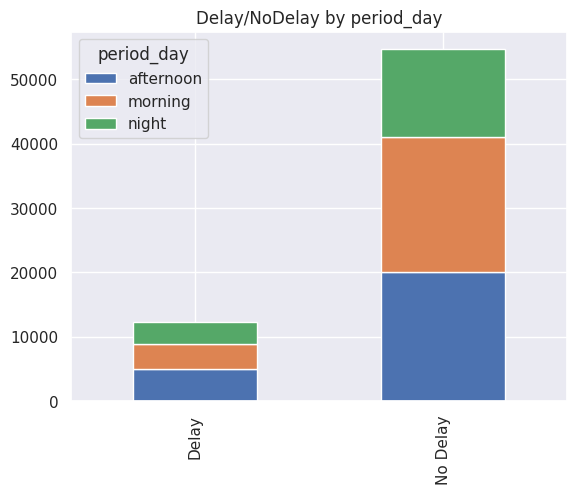

In [33]:
period_day_by_delay = data[data["delay"]==1]["period_day"].value_counts()
period_day_by_delay.head()

period_day_by_not_delay = data[data["delay"]==0]["period_day"].value_counts()
period_day_by_not_delay.head()

df_by_period_day = pd.DataFrame([period_day_by_delay, period_day_by_not_delay])
df_by_period_day.index = ["Delay", "No Delay"]
df_by_period_day.plot(kind="bar", stacked=True, title="Delay/NoDelay by period_day")

In [ ]:
# |`high_season`|
# 1 if `Date-I` is between Dec-15 and Mar-3
# or Jul-15 and Jul-31
# or Sep-11 and Sep-30
# 0 otherwise.|

# agregar en el data y hacer el grafico